In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


In [2]:
#calling baseball file
bbc=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
bbc

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number 
of wins for a given team in the 2015 season.
 

In [4]:
bbc.shape

(30, 17)

total no of rows are 30 and 17 columns.

In [5]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


there are no null values. dtype is int64 and 1 float.

In [6]:
bbc.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


this is the first 5 rows and columns of the data.

In [7]:
bbc.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

the name of all columns.

In [8]:
bbc.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

This shows that there are no null values. we can see this through visualization.

<Axes: >

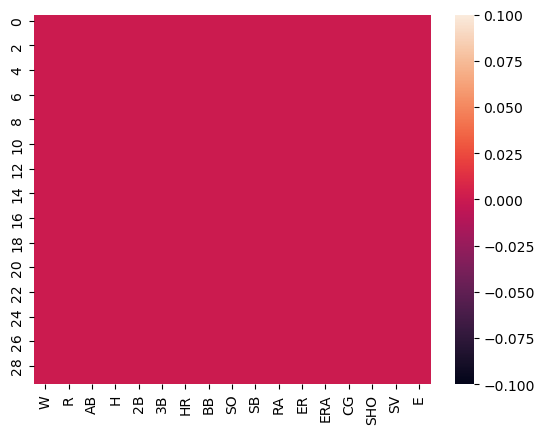

In [9]:
sns.heatmap(bbc.isnull())

Heatmap that shows that there are no null values.

In [10]:
bbc.nunique().to_frame('No of unique values')

,No of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


total value counts of all the columns.

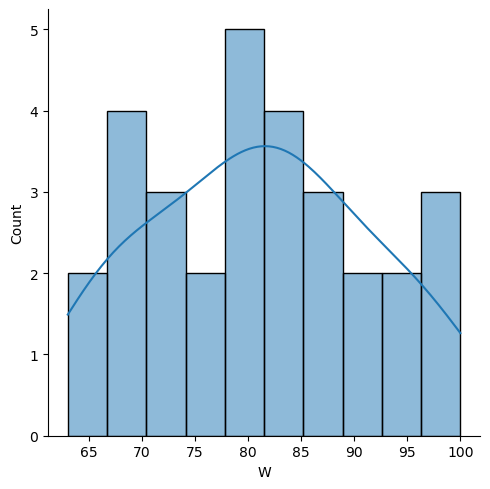

In [12]:
#baseball win
sns.displot(bbc['W'],bins=10,kde=True)

the visualization of W through displot forming the bell shape.

In [13]:
bbc.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


This statistical data shows that there are no missing values as the count of columns are same.
mean and median(50%) are almost same
There is little difference between the 75% and max which means there are less outliers present in the dataset.

<Axes: >

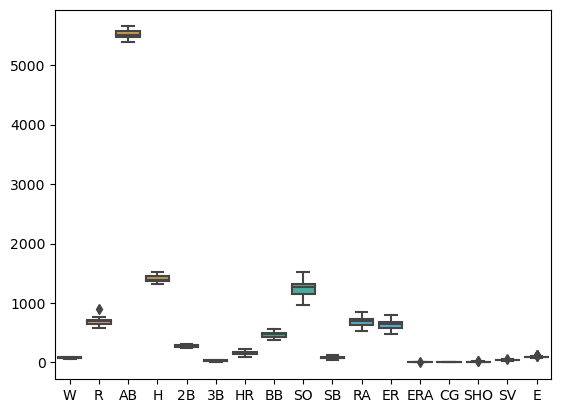

In [14]:
#dropping of duplicates values
bbc.drop_duplicates(inplace=True)
sns.boxplot(bbc)

In [50]:
#checking duplicate values
bbc.shape

(30, 17)

As we can see there are no duplicate values as after dropping duplicate values the count of rows and columns are same.
That means no value is dropped.

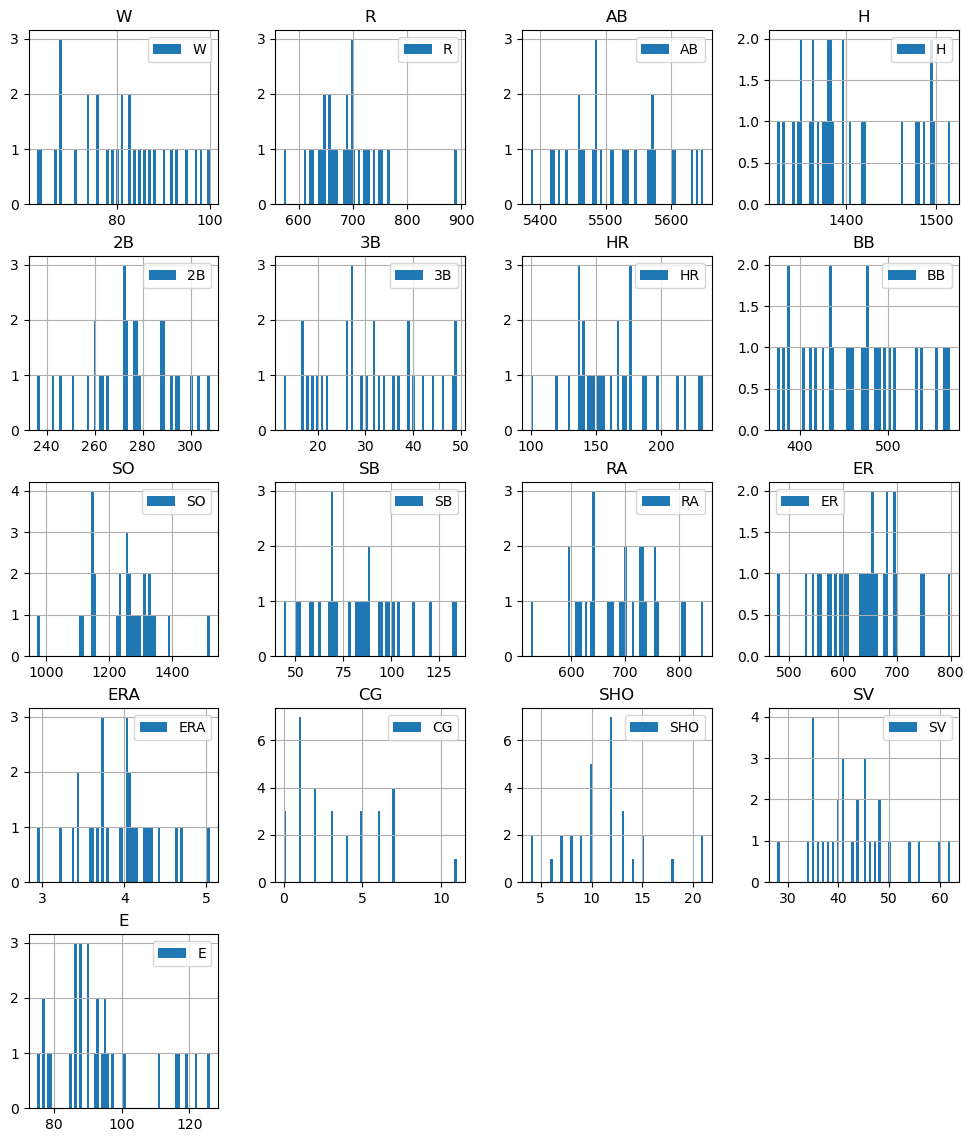

In [16]:
bbc.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

visualization of all the columns through histograph. And we can see all the columns have normal distributions.

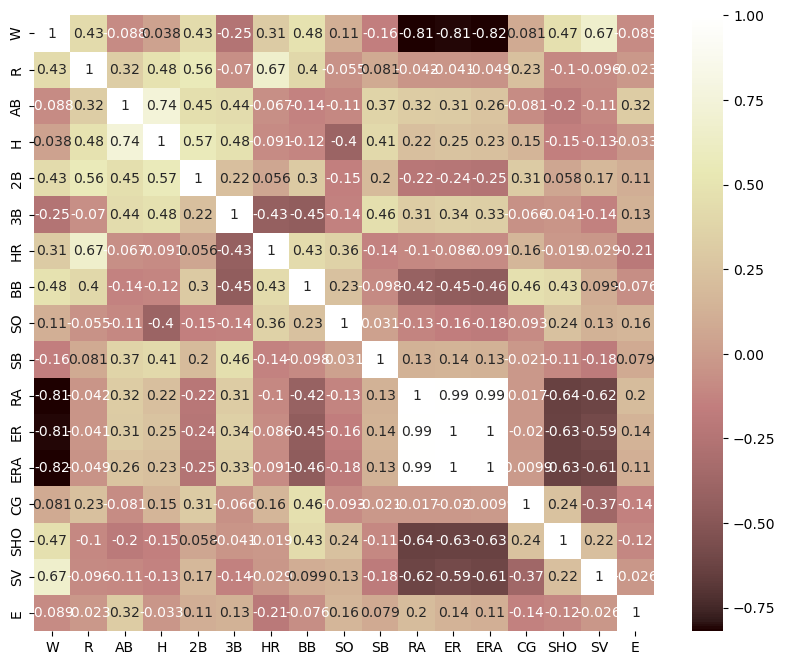

In [17]:
#checking the correlation
plt.figure(figsize=(10,8))
sns.heatmap(bbc.corr(),cmap='pink',annot=True)
plt.show()

This heatmap shows both the negative and positive relationship between the target and features.
ERA,ER and RA are negatively correlated with W.Where as SV is positively correlated with W.
RA,ER and ERA are highly positively correlated with each other.

In [18]:
bbc.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


W         Axes(0.125,0.786098;0.227941x0.0939024)
R      Axes(0.398529,0.786098;0.227941x0.0939024)
AB     Axes(0.672059,0.786098;0.227941x0.0939024)
H         Axes(0.125,0.673415;0.227941x0.0939024)
2B     Axes(0.398529,0.673415;0.227941x0.0939024)
3B     Axes(0.672059,0.673415;0.227941x0.0939024)
HR        Axes(0.125,0.560732;0.227941x0.0939024)
BB     Axes(0.398529,0.560732;0.227941x0.0939024)
SO     Axes(0.672059,0.560732;0.227941x0.0939024)
SB        Axes(0.125,0.448049;0.227941x0.0939024)
RA     Axes(0.398529,0.448049;0.227941x0.0939024)
ER     Axes(0.672059,0.448049;0.227941x0.0939024)
ERA       Axes(0.125,0.335366;0.227941x0.0939024)
CG     Axes(0.398529,0.335366;0.227941x0.0939024)
SHO    Axes(0.672059,0.335366;0.227941x0.0939024)
SV        Axes(0.125,0.222683;0.227941x0.0939024)
E      Axes(0.398529,0.222683;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

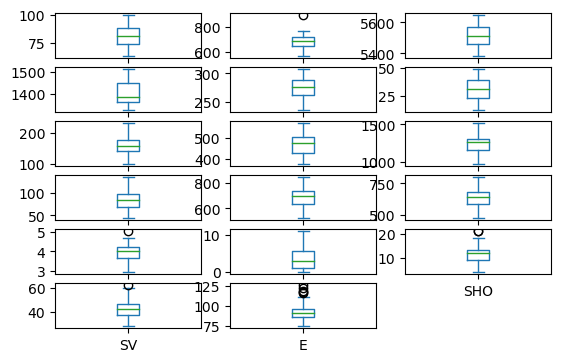

In [19]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
bbc.plot(kind='box',subplots=True,layout=(7,3))

Here we can see the presence of outliers in some of the columns. we can remove the outliers to clean the data.

In [20]:
#removing outliers
out=bbc[['SV','E','SHO','ERA','R']]
z=np.abs(zscore(out))
z

,SV,E,SHO,ERA,R
0,1.671607,0.461470,0.814629,0.506955,0.619078
1,0.249879,0.607197,0.172800,0.254598,0.134432
2,0.654856,1.117242,0.320914,0.641347,0.332906
3,0.784104,0.485758,0.567771,0.053010,1.146419
4,1.042600,0.607197,0.172800,1.531318,0.013270
5,1.171848,0.461470,0.320914,0.350165,3.509647
6,0.637623,0.097152,1.802057,0.165003,1.311430
7,0.008617,1.262970,0.320914,0.209800,0.428681
8,2.188598,0.048576,0.172800,0.484557,0.765626
9,0.396360,0.194303,0.320914,0.792164,1.034489


In [21]:
#checking skewness
bbc.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [22]:
x=bbc.iloc[:,:-1]
y=bbc.iloc[:,-1]

In [23]:
#seperating independent and target variables
x=bbc.drop('W',axis=1)
y=bbc['W']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (30, 16)
label dimension (30,)


In [24]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

here we have scaled the data using the standard scalarization method to overcome the issue of biasness.

# Building Model

In [25]:
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [26]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=KNN()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)   

Best accuracy 0.85 at random state 163


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [28]:
#Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pre=rd.predict(x_test)
pred=rd.predict(x_train)
print("R2 score:",r2_score(y_train,pred))
print("R2 score training data:",r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.9391503410576278
R2 score training data: 88.28309603375116
Mean absolute error: 2.3440908688199062
Mean square error: 6.769766736054884
Root mean square error: 2.6018775405569885


In [29]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.20142120434743838
19.258698757076132
Mean absolute error: 6.114756584140873
Mean square error: 46.65052960702269
Root mean square error: 6.830119296690409


In [30]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.914548095358224
85.77725
Mean absolute error: 2.403333333333334
Mean square error: 8.217588888888896
Root mean square error: 2.866633720740914


In [31]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.6735267406659939
85.0
Mean absolute error: 2.3111111111111122
Mean square error: 8.666666666666671
Root mean square error: 2.9439202887759497


In [32]:
#Lasso
las=Lasso()
las.fit(x_train,y_train)
pre=las.predict(x_test)
pred=las.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.8826261607629681
94.56352197510097
Mean absolute error: 1.259175830828217
Mean square error: 3.1410761921638874
Root mean square error: 1.7723081538389105


In [33]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
88.36528846153848
Mean absolute error: 2.1899999999999995
Mean square error: 6.722277777777769
Root mean square error: 2.592735578067646


In [34]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9706176641914115
-236.31810540307532
Mean absolute error: 10.223900558277156
Mean square error: 194.31712756622133
Root mean square error: 13.939767844774938


# Cross Validation

In [35]:
# Cv score for Ridge
score= cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[ 0.70540662 -1.0890305   0.60224726  0.75704782  0.89815069]
0.3747643783453948
difference between R2score and cross validation -273.7945432376148


In [36]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-0.10789716 -0.91162278 -0.27068094 -0.59880557 -0.00965486]
-0.3797322622418709
difference between R2score and cross validation -198.34487917888822


In [37]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[ 0.1218579  -4.65960191  0.13468279  0.32580176  0.76499686]
-0.6624525189310172
difference between R2score and cross validation -170.07285350997358


In [38]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[ 0.3164476  -2.36687023  0.32268088  0.34337206  0.56615385]
-0.1636431681468944
difference between R2score and cross validation -219.9537885883859


In [39]:
# Cv score for lasso
score= cross_val_score(las,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[ 0.79181711 -0.45701732  0.66914405  0.68073377  0.91415881]
0.519767284010903
difference between R2score and cross validation -288.29483380416565


In [40]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[-0.06663668 -4.84410649  0.47302864  0.44880195  0.7488526 ]
-0.6480119960345379
difference between R2score and cross validation -171.51690579962153


In [41]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[ 0.71136471 -2.21099237  0.38808753  0.73556937  0.5797478 ]
0.04075540667455883
difference between R2score and cross validation -240.3936460705312


lasso is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [42]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [43]:
para={'alpha':[1.0],
     'fit_intercept':['bool',True],
     'max_iter':[1000],
     'copy_X':[True]}
las_cv=GridSearchCV(Lasso(),para,cv=5)
las_cv.fit(x_train,y_train)
print(las_cv.best_params_)

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000}


In [44]:
#setting new parameters
las_new=Lasso(alpha=1.0,copy_X=True,fit_intercept=True,max_iter=1000)
las_new.fit(x_train,y_train)
y_pred_new=las_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.9456352197510096


In [45]:
#checking the the new set parameters
las_new.fit(x_train,y_train)
pre=las_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.9456352197510096
mean absolute error: 1.259175830828217
mean square error; 3.1410761921638874
root mean squre error: 1.7723081538389105


importing pickle and storing the file

In [46]:
import joblib
import pickle
filename="Baseball case.pkl"
pickle.dump(las_new,open(filename,'wb'))

In [47]:
load_m=pickle.load(open('Baseball case.pkl','rb'))

In [48]:
result=load_m.score(x_test,y_test)
print(result*100)

94.56352197510097


In [49]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8
predicted,89.521091,77.606099,75.778986,86.604249,87.591572,79.436176,68.579731,87.1961,83.756095
orginal,90.000000,76.000000,74.000000,86.000000,92.000000,78.000000,68.000000,87.0000,84.000000
